## Analyzing Ford-Bike Data 
by **Mashael AlKhalifa**


### TABLE OF CONTENT
- **Introduction**
- **Preliminary Wrangling**
- **Part I   - Gathering Data**
- **Part II  - Assessing Data**
- **Part III - Cleaning Data**
- **Part V   - Bivariate Exploration**
- **Part IV  - Univariate Exploration**
- **Part VI  - Multivariate Exploration**
------

### Introduction

Bay Wheels also known as Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.



### Dataset 
It is a dataset for public use it and contains information about trips duration, trips starting and ending stations,...etc. in this document, I will explore and visualize this dataset.

### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

### Part I - Gathering Data

In [2]:
# load the dataset
df = pd.read_csv('Bikes-data.csv')

### Part II - Assessing Data

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.shape

(183412, 16)

In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Check if duplicates row exist
df.dropna(inplace=True)

In [8]:
df.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [9]:
df.member_gender.value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [10]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


#### Quality issues
- Some rows that does not have member_gender & start/end station_id & start/end name of station.
- Start time and end time are objects not a timestamps and extract the day_of_week, hours information from the start_time.
- Bike_id, start_station_id, end_station_id can be set to object. 
- Convert member_gender, user_type into category.
- Make the duration as minutes with new fields.
- Extract start/end 'date' from start/end 'time' fileds.
- Calculate age from member_birth_year.

### Part III - Cleaning Data

In [11]:
## make copy of the original df
df_clean = df.copy()

###### Define
Quality issue 1 - Some rows that does not have member_gender & start/end station_id & start/end name of station.

###### Code

In [12]:
# Remove rows that does not have member_gender value
df_clean = df[df['member_gender'].isnull() == False]

In [13]:
# Remove reows that does not have start/end station_id
df_clean = df_clean[df_clean['start_station_id'].isnull() == False]
df_clean = df_clean[df_clean['end_station_id'].isnull() == False]

In [14]:
# Remove reows that does not have start/end name of station
df_clean = df_clean[df_clean['start_station_name'].isnull() == False]
df_clean = df_clean[df_clean['end_station_name'].isnull() == False]

###### Test

In [15]:
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

###### Define
Quality issue 2 - Set appropriate data types for start_time & end_time fields

###### Code

In [16]:
# convert the object dataType to timestamps for start_time & end_time
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [17]:
# Extract day_of_week, hours information from the start_time
df_clean['start_day_of_week']= df_clean['start_time'].dt.strftime('%a')
df_clean['start_time_hour']= df_clean['start_time'].dt.hour

###### Test

In [18]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour   

###### Define
Quality issue 3 - Bike_id, start_station_id, end_station_id can be set to object.

###### Code

In [19]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.start_station_id.astype(str)
df_clean.end_station_id = df_clean.end_station_id.astype(str)

###### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour    

###### Define
Quality issue 4 - Convert member_gender, user_type into category

###### Code

In [21]:
df_clean['member_gender'] = df_clean['member_gender'].astype('category')
df_clean['user_type'] = df_clean['user_type'].astype('category')

###### Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour

###### Define 
Quality issue 5 - Make the duration as minutes with new fields.

###### Code

In [23]:
# Creat new columns 'duration_minute' & then converting its types to float
df_clean['duration_minute'] = (df_clean['duration_sec'] / 60).astype(float)

###### Test

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour

###### Define
Quality issue 6 - Extract start/end 'date' from start/end 'time' fileds.

###### Code

In [25]:
# Create a new column called <start_date> to extract the date from <start_time>
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['start_time'] = pd.to_datetime(df_clean['start_time']).dt.time
# Create a new column called <end_date> to extract the date from <end_time>
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['end_time'] = pd.to_datetime(df_clean['end_time']).dt.time

In [26]:
# So, lets convert the start/end 'date' type to datetime
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])

###### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour            1749

###### Define
Quality issue 7 - Calculate age from member_birth_year.

###### Code

In [28]:
df_clean['age'] = 2020 - df_clean['member_birth_year']

In [29]:
## covert the age to integer
df_clean['age'] = df_clean['age'].astype(int)

###### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
start_day_of_week          174952 non-null object
start_time_hour            1749

In [31]:
# drop unnecessary columns
df_clean.drop(columns = ['start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude'], inplace=True)

### What is the structure of your dataset?
This dataset contains over 180000 bike rides. The dataset contained features about: Trip duration,  Start station name, Start station latitude, Start time, End time, Start station id, Start station longitude, End station id, End station name, End station latitude, End station longitude, Bike id, User type and Bike share for all trips.

### What is/are the main feature(s) of interest in your dataset?
I am interested in exploring these:
- The member age who use the GoBike application. 
- The average duration of trip in minutes/seconds.
- The distribution of member_gender & user_type for GoBike application users.
- Average Trip Duration(min) per day for Month.
- The effect of user type,gender & age on long trip duration.
- Average duration of rides gender over the day.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- The age,gender & type of users.
- The start & end time.
- Trip Duration.

# Part IV - Univariate Exploration

### The member age who use the GoBike application. 

In [32]:
df_clean['age'].describe()

count    174952.000000
mean         35.196865
std          10.118731
min          19.000000
25%          28.000000
50%          33.000000
75%          40.000000
max         142.000000
Name: age, dtype: float64

##### As we see the max value of age is 142 !! some thing wrong

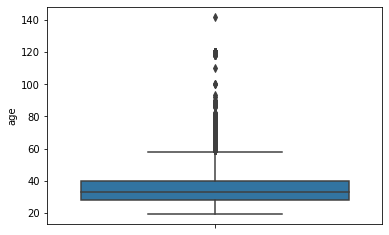

In [33]:
sns.boxplot(data = df_clean, y = 'age')
plt.show()

##### We need to calculate the IQR
- Q1 = 28.0
- Q3 = 40.0 
- IOR = Q3 - Q1 = 40.0 - 28.0 = 12.0
- Let's determine what is the upper outliner bound => (Q3 + 1.5 * IQR) = (40.0 + 1.5 * 12.0) = 40+(1.5 * 12) = 58


In [34]:
# approximate 60 years old, so keep the all age blew 60 old years.
df_clean = df_clean[df_clean['age'] <= 60]

In [35]:
df_clean['age'].describe()

count    170798.000000
mean         34.426656
std           8.826842
min          19.000000
25%          28.000000
50%          33.000000
75%          39.000000
max          60.000000
Name: age, dtype: float64

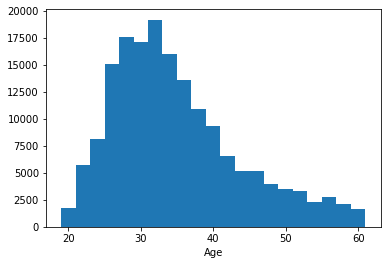

In [36]:
min_age = df_clean['age'].min()
max_age = df_clean['age'].max()
bins = np.arange(min_age, max_age+2, 2)
plt.hist(data = df_clean, x = 'age', bins = bins);
plt.xlabel('Age')
plt.show()

#### Looks perfect by violin chart

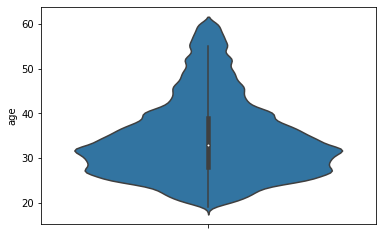

In [37]:
sns.violinplot(data = df_clean, y = 'age')

#### The data is not distributed evenly. There are many bikers are around age 32. There are not that many bikers above age 40.
-----

### The average duration of trip in minutes/seconds.

**We can see the distribution of how long these bikes are used by people within minutes.**

In [38]:
df_clean['duration_minute'].describe()

count    170798.000000
mean         11.717786
std          27.621507
min           1.016667
25%           5.366667
50%           8.483333
75%          13.100000
max        1409.133333
Name: duration_minute, dtype: float64

#### The data is not distributed normally. Let's calculate of IQR:
- Q1 = 5.36
- Q3 = 13.10
- IQR = Q3 - Q1 = 13.10 - 5.36 = 7.74
- Let's determine what is the upper outliner bound => (Q3 + 1.5 * IQR) = 24.71

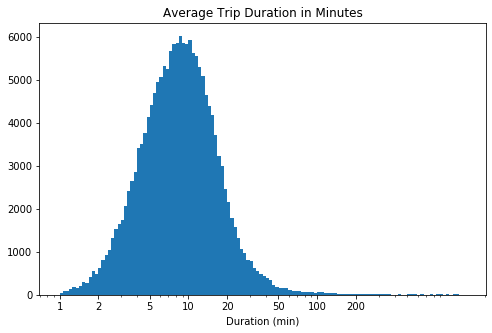

In [39]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200]);
plt.title('Average Trip Duration in Minutes')
plt.xlabel('Duration (min)');
plt.show()

-  The distribution looks closer to normal distribution. we can see that The majority of the trips take less than 10 minutes. 

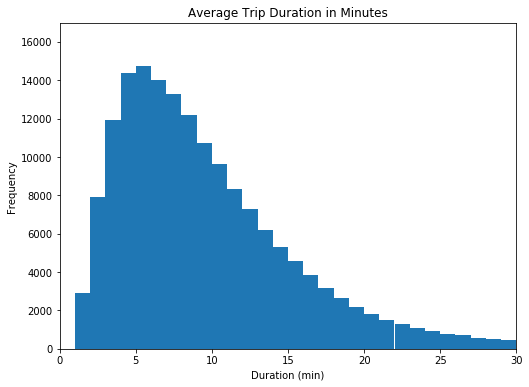

In [40]:
plt.figure(figsize = [18, 6])


plt.subplot(1, 2, 1)
bins = np.arange(0, df_clean['duration_minute'].max() + 1, 1)
plt.hist(data = df_clean, x = 'duration_minute', bins = bins)
plt.xlim(0, 30)
plt.ylim(0, 17000)
plt.title('Average Trip Duration in Minutes')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency');



- As we can see from subplot is the plot is right-skewed, as a result of a lower boundary in the dataset. Therefore, we need to perform a log transformation.

------

**We can see the distribution of how long these bikes are used by people within seconds.**

In [41]:
df_clean['duration_sec'].describe()

count    170798.000000
mean        703.067138
std        1657.290421
min          61.000000
25%         322.000000
50%         509.000000
75%         786.000000
max       84548.000000
Name: duration_sec, dtype: float64

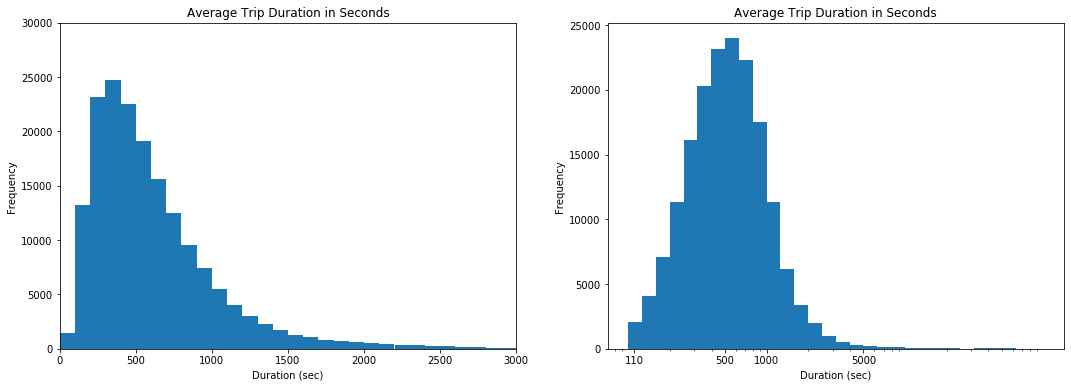

In [42]:
plt.figure(figsize = [18, 6])

# Subplot-1
plt.subplot(1, 2, 1)
bins = np.arange(0, df['duration_sec'].max() + 100, 100)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim(0, 3000)
plt.ylim(0, 30000)
plt.title('Average Trip Duration in Seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

# Subplot-2
plt.subplot(1, 2, 2)
bins = 10 ** np.arange(2, 5 + 0.1, 0.1)
ticks = [110, 500, 1000, 5000]
lables = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks(ticks, lables)
plt.title('Average Trip Duration in Seconds')
plt.xlabel('Duration (sec)')
plt.ylabel('Frequency');

- As we can see from subplot (1) is the plot is right-skewed, as a result of a lower boundary in the dataset. Therefore, we need to perform a log transformation to adjust the data.
- In subplot (2), the plot looks more normally distributed. The majority of the trips take approximately 600 seconds.
-------------

### The distribution of user_type & age for GoBike application users.

In [43]:
# cals the subscribe & customer users
customer_users = df_clean['user_type'].value_counts()[0]
subscriber_users = df_clean['user_type'].value_counts()[1]
subscriber_prop = subscriber_users / df_clean['user_type'].value_counts().sum()
customer_prop = customer_users / df_clean['user_type'].value_counts().sum()

# cals the male & female users
female_users = df_clean['member_gender'].value_counts()[0]
male_users = df_clean['member_gender'].value_counts()[1]
other_users = df_clean['member_gender'].value_counts()[2]
male_prop = male_users / df_clean['member_gender'].value_counts().sum()
female_prop = female_users / df_clean['member_gender'].value_counts().sum()
other_prop = other_users / df_clean['member_gender'].value_counts().sum()
df_clean['member_gender'].value_counts()

Male      126995
Female     40215
Other       3588
Name: member_gender, dtype: int64

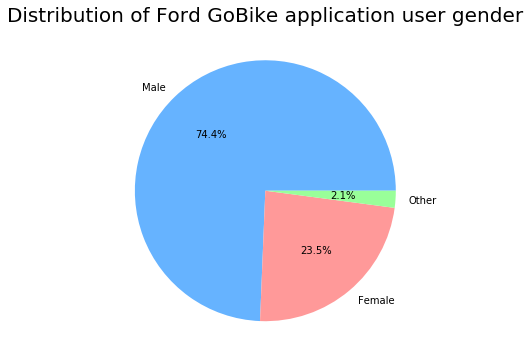

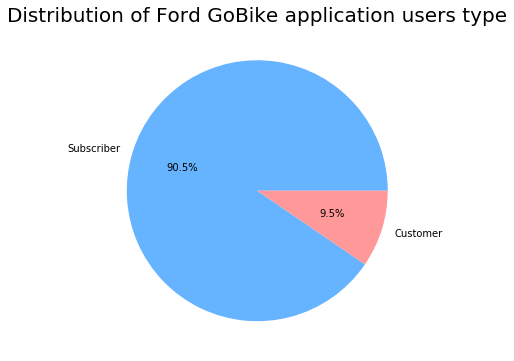

In [44]:
figsize = (16,6)
#creating a list of colors to use
colors = ['#66b3ff','#ff9999','#99ff99']

# for user_gender
gender_dist=df_clean['member_gender'].value_counts()
#setting the plot axes and plotting the data
plt.subplots(figsize=figsize)
gender_dist.plot(kind='pie' , autopct='%1.1f%%' , colors=colors)
#setting the plot's title
plt.title('Distribution of Ford GoBike application user gender' , fontsize = 20)
# To ignore show the name of field  member_gender
plt.ylabel('')
plt.show()

# for user_type
sorted_counts_type = df_clean['user_type'].value_counts()
#setting the plot axes and plotting the data
plt.subplots(figsize=figsize);
sorted_counts_type.plot(kind='pie' , autopct='%1.1f%%' , colors=colors)
#setting the plot's title
plt.title('Distribution of Ford GoBike application users type' , fontsize = 20)
# To ignore show the name of field user_type
plt.ylabel('')
plt.show()

- The most gender use the app is male around (74.4%) than female (23.5%) and other(2.1%)
- GoBike app certainly has more subscribers (90.5%) than non-subscribers (9.5%).
--------------

## Part V - Bivariate Exploration

### Average Trip Duration(min) per day for Month

In [45]:
# Let's anaylsis the distrbution of how long users take a trip given everyday - for month
df_clean_by_days = df_clean.groupby('start_date').sum().reset_index()
df_clean_by_days['start_date'] = df_clean_by_days['start_date'].dt.strftime('%Y-%m-%d')

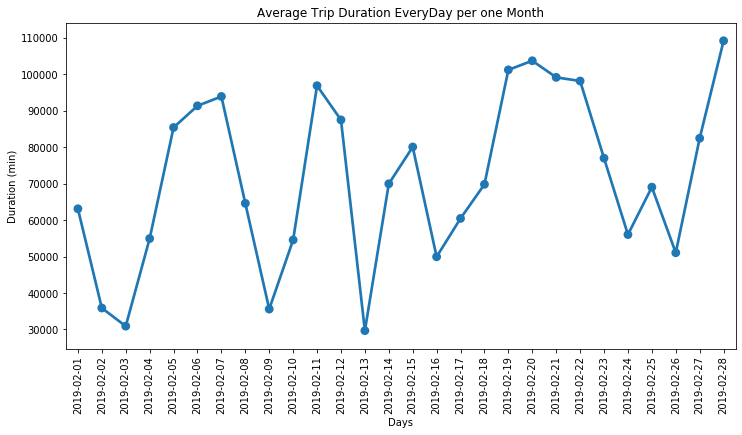

In [46]:
plt.figure(figsize = [12, 6])

sns.pointplot(data = df_clean_by_days, x = df_clean_by_days['start_date'], y = df_clean_by_days['duration_minute'])
plt.title('Average Trip Duration EveryDay per one Month')
plt.xlabel('Days')
plt.ylabel('Duration (min)')
plt.xticks(rotation = 90)
plt.show()

- So, the duration of the trips wasn't consistent. 28 day had the longest trip, while 3,9 and 13 had the shortest trips.

## Part VI - Multivariate Exploration 

### The effect of user type and age on long trip duration

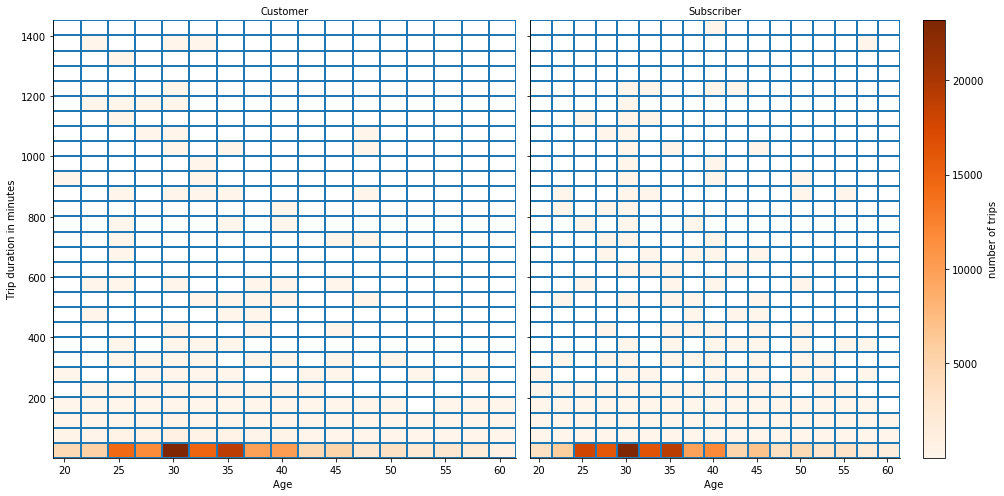

In [47]:
bins_x = np.arange(df_clean.age.min(), df_clean.age.max()+2.5, 2.5)
bins_y = np.arange(df_clean.duration_minute.min(), df_clean.duration_minute.max()+50, 50)

g = sns.FacetGrid(data = df_clean, col = 'user_type', height = 7, col_wrap = 2)
g.map(plt.hist2d, 'age', 'duration_minute',cmin=0.5,bins = [bins_x, bins_y], cmap='Oranges')

g.set_ylabels('Trip duration in minutes')
g.set_xlabels('Age ')
g.set_titles('{col_name}')


plt.colorbar(label = 'number of trips')
plt.show()

### The effect of the gender and age on trip duration

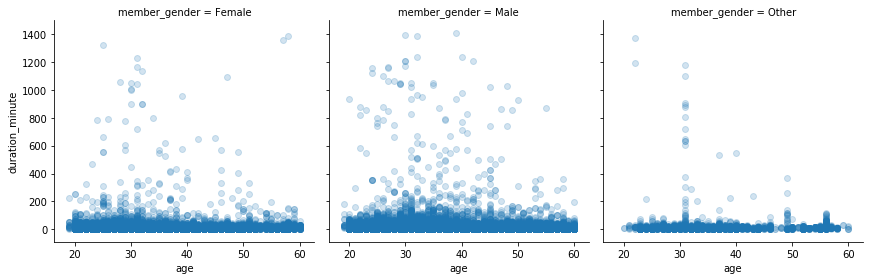

In [48]:
g = sns.FacetGrid(data = df_clean, col = 'member_gender', height = 4,col_wrap = 4)
g.map(plt.scatter, 'age', 'duration_minute',alpha=1/5)
plt.show()

- So as we see the plots above shows that the trips with high duration are mostly taken by males who's age between 25 and 35

### Average duration of rides gender over the day.

Lets visualizing the relationship between duration, gender and hour

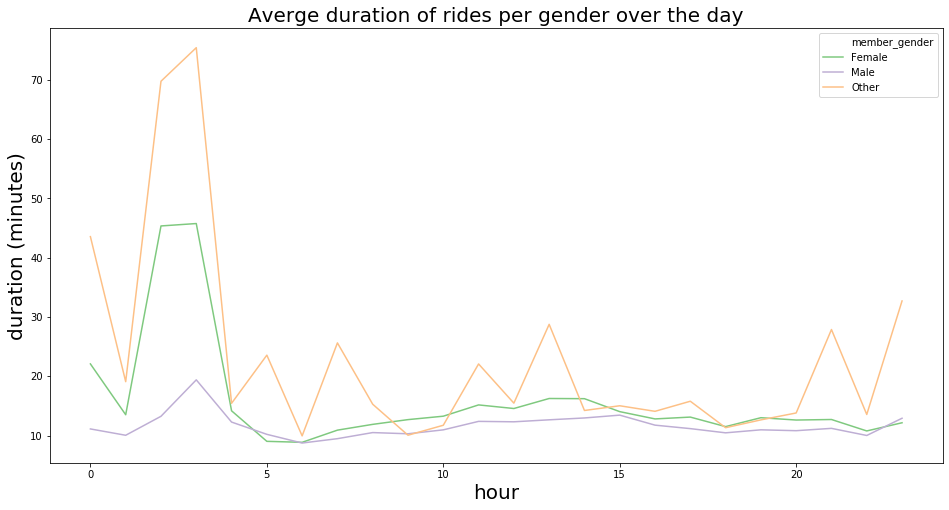

In [49]:
plt.figure(figsize = (16, 8))
sns.lineplot(data = df_clean.sort_values('start_time_hour'), x = df_clean['start_time_hour'],y= df_clean['duration_minute'],
             hue = df_clean['member_gender'], palette = 'Accent', ci = None)
plt.title('Averge duration of rides per gender over the day' , fontsize =20)
plt.xlabel('hour' , fontsize=20)
plt.ylabel('duration (minutes)' , fontsize=20)
plt.show()

- The other is the longest in early hours, and females take longer than males in early hours.

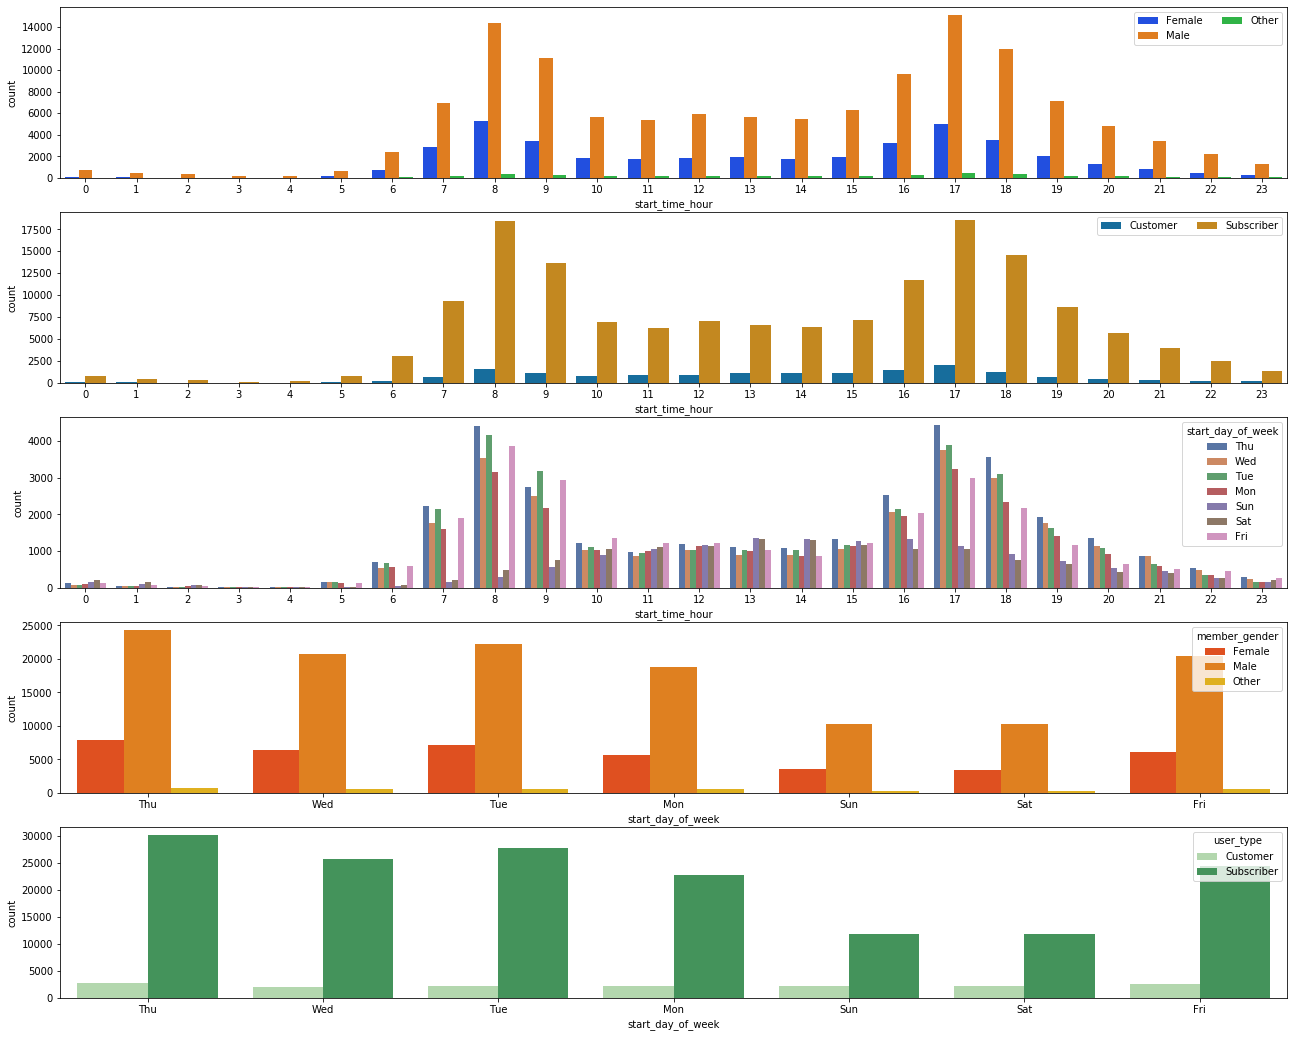

In [50]:
plt.figure(figsize = [22, 22])

ncol = 2
loc = 1
# re-arrange legend to reduce overlapping
ax_plot = plt.subplot(6, 1, 1)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'member_gender', palette = 'bright')
ax_plot.legend(loc = loc,ncol = ncol)

ax_plot = plt.subplot(6, 1, 2)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'user_type', palette = 'colorblind')
ax_plot.legend(loc = loc, ncol = ncol)

plt.subplot(6, 1, 3)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_day_of_week', palette = 'deep')

ax_plot = plt.subplot(6, 1, 4)
sns.countplot(data = df_clean, x = 'start_day_of_week', hue = 'member_gender', palette = 'autumn')

ax_plot = plt.subplot(6, 1, 5)
sns.countplot(data = df_clean, x = 'start_day_of_week', hue = 'user_type', palette = 'Greens')
plt.show()

#### Observations from above plots:

- 17:00 hour has the most male bikers compared to other hours. 8:00  and 17:00 PM have more female bikers compared to other hours.
- 8:00 & 17:00 hours have the most 'Subscriber' bikers compared to other hours and the 17:00 also has the most 'Customer' bikers compared to other hours.
- Thursday day at 8:00 & 17:00 hours have the highest biker counts on days number 8 & 17, 24 hours.
- Thursday has the most male bikers compared to other days. It also has the most female bikers compared to other days.
- Thursday has the most 'Subscriber' bikers compared to other days. The difference in counts of'customer' across days isn't huge. 

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Yes, I find that the trip duration is effected by the age and the gender of the users , also I can see that the number of long trip duration for customers whose ages between 25 and 35 almost the same of the number of long trip duration for subscribers whose in the same age.

## Were there any interesting or surprising interactions between features?

It is surprising that number of long trip duration for customers whose ages between 25 and 35 is approximately the same of the number of long trip duration for subscribers whose in the same age **although the number of subscribers is much greater than the number of cutomers**.